In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.js

mv: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.js': No such file or directory


In [ ]:
!kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

Dataset URL: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
License(s): other
imdb-dataset-of-50k-movie-reviews.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip /content/imdb-dataset-of-50k-movie-reviews.zip

Archive:  /content/imdb-dataset-of-50k-movie-reviews.zip
replace IMDB Dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score ,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, SpatialDropout1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Dense, LSTM, Embedding, SpatialDropout1D
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv('IMDB Dataset.csv')

data.head(20)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


**Data Analysis**

In [ ]:
data.shape


(50000, 2)

In [ ]:
data.isnull().sum()


,0
review,0
sentiment,0


In [ ]:
data.sentiment.value_counts()

,count
sentiment,
positive,25000
negative,25000


In [ ]:
data.review.value_counts()

,count
review,
"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences, forget charm, forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal, I couldn't say I was ready for it, but as I watched more, I developed a taste for Oz, and got accustomed to the high levels of graphic violence. Not just violence, but injustice (crooked guards who'll be sold out for a nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz, you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side.",1
"Beware, My Lovely came on TV on BBC2 recently during the early hours so I set the video to record it and was pleased I did.<br /><br />A man finds a dead woman so he escapes so he don't get the blame for her murder and gets a job as a handyman at a widow's house but she does not know what she is taking on here. It turns out this man is a psychopath and possible killer. He starts tormenting her and locks her in the cellar. He then cuts the phones line so she can't get help from the outside. A young boy who regularly does shopping for her notices something isn't quite right when he comes to drop her shopping off. Eventually, the man leaves, acting as if nothing has happened.<br /><br />I can see why Beware, My Lovely was given an X certificate when released in the cinemas. Some of the scenes are rather nasty for this time. I also thought the man was going to do something to the young boy too.<br /><br />The cast features an excellent performance from Robert Ryan as the psychopath, Ida Lupino as the widow and are joined by Barbara Whiting and Dee Pollock as the boy.<br /><br />This is certainly Robert Ryan's most chilling performance I've seen. A must see.<br /><br />Rating: 4 stars out of 5.",1
I have copies of both these Movies the classic where Robert blake is a mighty fine actor where most of the 1967 movie Blake is more shown standing by a window in jail telling his childhood life where it makes since why he killed the Clutter Family doesn't show much in the classic of what really went on an doesn't tell us which one really done the killing but it's a great eye catcher really if you watch the 1996 movie In cold Blood the classic makes a lot more sence .,1
"The Stepford Children, besides being a very good made for TV movie, shows the very disturbing result of indoctrination. It is quite a statement about how being made to act within the confines of what is considered ""Good"" behavior can destroy whatever it is that makes a person unique and an individual. I think that this is a movie that parents who want to maintain some semblance of the thought that loams within the hearts and minds of youngsters should watch with their children and discuss what the movie is saying. I don't k

In [ ]:
data.duplicated().sum()

418

**Data cleaning**

In [ ]:
data = data.drop_duplicates()


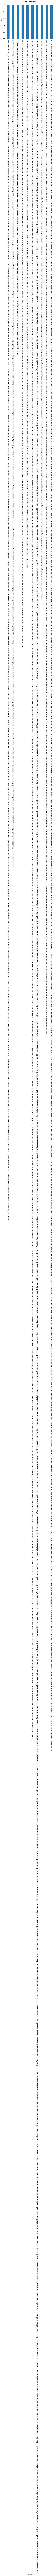

In [ ]:
data['review'].value_counts().nlargest(10).plot(kind='bar')
plt.title('Top 10 review')
plt.xlabel('review')
plt.ylabel('Count')
plt.show()


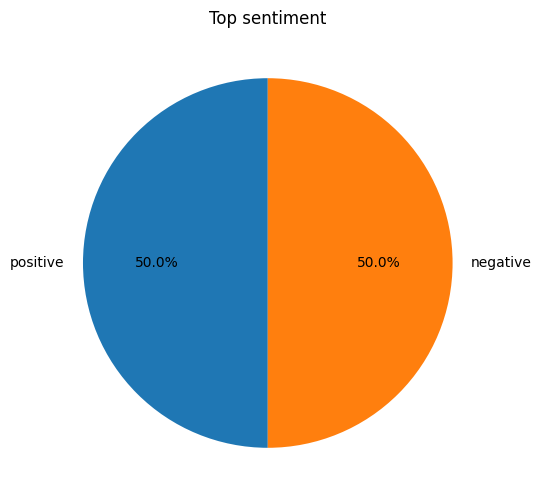

In [ ]:
sentiment_count = data.sentiment.value_counts().nlargest(5)
plt.figure(figsize=(8, 6))
plt.pie(sentiment_count.values, labels=sentiment_count.index, autopct='%1.1f%%', startangle=90)
plt.title('Top sentiment')
plt.show()

**Encoding**

In [ ]:
data['sentiment'] = data['sentiment'].map({'negative': 0, 'positive': 1})

**Text Cleaning**

In [ ]:
def clean_text(text):
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = text.lower()
    return text

data['review'] = data['review'].apply(clean_text)

**Text Vectorization**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(data['review']).toarray()
y = data['sentiment']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**SVM model**

In [ ]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

print('SVM Model Accuracy:', accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

**Logistic Regression**

In [ ]:
ml_model = LogisticRegression()
ml_model.fit(X_train, y_train)

y_pred_ml = ml_model.predict(X_test)
print('ML Model Accuracy:', accuracy_score(y_test, y_pred_ml))
print(classification_report(y_test, y_pred_ml))


ML Model Accuracy: 0.8936
              precision    recall  f1-score   support

    negative       0.90      0.88      0.89      7411
    positive       0.89      0.90      0.90      7589

    accuracy                           0.89     15000
   macro avg       0.89      0.89      0.89     15000
weighted avg       0.89      0.89      0.89     15000



**confusion matrix shows the true vs. predicted classes for the model’s predictions**

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

**Accuracy Comparison of ML Models (SVM vs Logistic Regression)**

In [ ]:
accuracies = [accuracy_score(y_test, y_pred_ml), accuracy_score(y_test, y_pred_svm)]
model_names = ['Logistic Regression', 'SVM']

plt.figure(figsize=(8, 6))
plt.bar(model_names, accuracies, color=['lightblue', 'lightgreen'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

**Deep Learning ( CNN )**

In [ ]:
X = data['review']
y = data['sentiment']

In [ ]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [ ]:
max_words = 5000
max_len = 150
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

In [ ]:
model = Sequential()
model.add(Embedding(max_words, 128, input_length=max_len))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten

model_cnn = Sequential()
model_cnn.add(Embedding(max_words, 128, input_length=max_len))
model_cnn.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Flatten())
model_cnn.add(Dense(10, activation='relu'))
model_cnn.add(Dense(1, activation='sigmoid'))

model_cnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history_cnn = model_cnn.fit(X_train_pad, y_train, epochs=5, batch_size=64, validation_data=(X_test_pad, y_test))

Epoch 1/5
620/620 [==============================] - 9s 13ms/step - loss: 0.6932 - accuracy: 0.5010 - val_loss: 0.6931 - val_accuracy: 0.5020
Epoch 2/5
620/620 [==============================] - 8s 13ms/step - loss: 0.6932 - accuracy: 0.5016 - val_loss: 0.6932 - val_accuracy: 0.4980
Epoch 3/5
620/620 [==============================] - 8s 13ms/step - loss: 0.3594 - accuracy: 0.8293 - val_loss: 0.2816 - val_accuracy: 0.8812
Epoch 4/5
620/620 [==============================] - 8s 13ms/step - loss: 0.2159 - accuracy: 0.9125 - val_loss: 0.2878 - val_accuracy: 0.8808
Epoch 5/5
620/620 [==============================] - 8s 13ms/step - loss: 0.1573 - accuracy: 0.9407 - val_loss: 0.3194 - val_accuracy: 0.8798


**RNN**

In [ ]:
history = model.fit(X_train_pad, y_train, epochs=5, batch_size=64, validation_data=(X_test_pad, y_test))

Epoch 1/5
620/620 [==============================] - 101s 160ms/step - loss: 0.3797 - accuracy: 0.8287 - val_loss: 0.3196 - val_accuracy: 0.8651
Epoch 2/5
620/620 [==============================] - 99s 160ms/step - loss: 0.2719 - accuracy: 0.8909 - val_loss: 0.3171 - val_accuracy: 0.8706
Epoch 3/5
620/620 [==============================] - 100s 161ms/step - loss: 0.2289 - accuracy: 0.9095 - val_loss: 0.3303 - val_accuracy: 0.8537
Epoch 4/5
620/620 [==============================] - 99s 160ms/step - loss: 0.1999 - accuracy: 0.9210 - val_loss: 0.3241 - val_accuracy: 0.8755
Epoch 5/5
620/620 [==============================] - 99s 160ms/step - loss: 0.1713 - accuracy: 0.9332 - val_loss: 0.3339 - val_accuracy: 0.8695


In [ ]:
loss, accuracy = model.evaluate(X_test_pad, y_test)
print(f'Loss: {loss:.4f}, Accuracy: {accuracy:.4f}')

310/310 [==============================] - 9s 28ms/step - loss: 0.3339 - accuracy: 0.8695
Loss: 0.3339, Accuracy: 0.8695


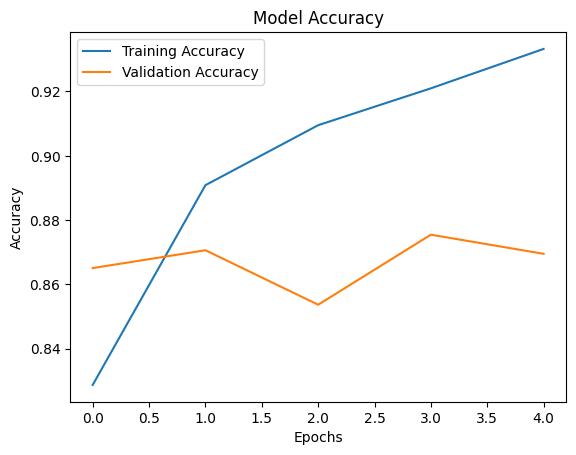

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

In [ ]:
print(X_train.shape)
print(X_test.shape)


(39665, 1)
(9917, 1)


Epoch 1/5
620/620 [==============================] - 6s 8ms/step - loss: 0.4374 - accuracy: 0.7890 - val_loss: 0.3034 - val_accuracy: 0.8693
Epoch 2/5
620/620 [==============================] - 5s 8ms/step - loss: 0.2397 - accuracy: 0.9129 - val_loss: 0.3234 - val_accuracy: 0.8636
Epoch 3/5
620/620 [==============================] - 5s 8ms/step - loss: 0.1250 - accuracy: 0.9587 - val_loss: 0.4135 - val_accuracy: 0.8604
Epoch 4/5
620/620 [==============================] - 5s 8ms/step - loss: 0.0604 - accuracy: 0.9801 - val_loss: 0.5296 - val_accuracy: 0.8557
Epoch 5/5
310/310 [==============================] - 1s 2ms/step - loss: 0.6174 - accuracy: 0.8586
Loss (NN): 0.6174, Accuracy (NN): 0.8586


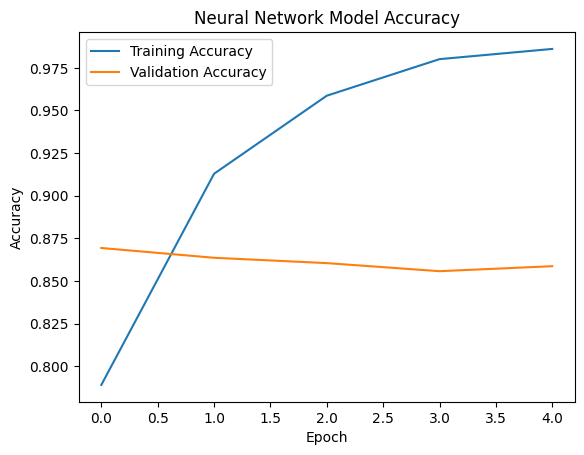

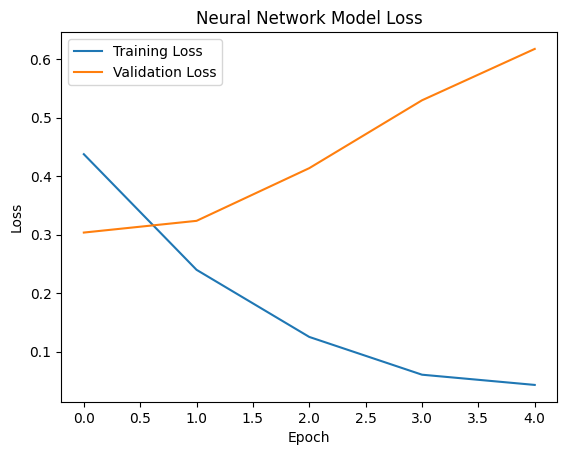

In [ ]:
max_len = 150

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Embedding

model_nn = Sequential()
model_nn.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
model_nn.add(Flatten())
model_nn.add(Dense(10, activation='relu'))
model_nn.add(Dropout(0.5))
model_nn.add(Dense(1, activation='sigmoid'))

model_nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


history_nn = model_nn.fit(X_train_pad, y_train, epochs=5, batch_size=64, validation_data=(X_test_pad, y_test))

loss_nn, accuracy_nn = model_nn.evaluate(X_test_pad, y_test)
print(f'Loss (NN): {loss_nn:.4f}, Accuracy (NN): {accuracy_nn:.4f}')

import matplotlib.pyplot as plt

plt.plot(history_nn.history['accuracy'], label='Training Accuracy')
plt.plot(history_nn.history['val_accuracy'], label='Validation Accuracy')
plt.title('Neural Network Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

plt.plot(history_nn.history['loss'], label='Training Loss')
plt.plot(history_nn.history['val_loss'], label='Validation Loss')
plt.title('Neural Network Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

**Connecting Deep Learning with Machine Learning**

In [ ]:
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

feature_extractor = Model(inputs=model_nn.input, outputs=model_nn.layers[-2].output)

deep_features_train = feature_extractor.predict(X_train_pad)
deep_features_test = feature_extractor.predict(X_test_pad)
print(deep_features_train.shape)
print(deep_features_test.shape)


310/310 [==============================] - 1s 2ms/step
(39665, 10)
(9917, 10)


In [ ]:
from tensorflow.keras.models import Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

feature_extractor = Model(inputs=model_nn.input, outputs=model_nn.layers[-2].output)
deep_features_train = feature_extractor.predict(X_train_pad)
deep_features_test = feature_extractor.predict(X_test_pad)

ml_model = RandomForestClassifier(n_estimators=100)
ml_model.fit(deep_features_train, y_train)

y_pred = ml_model.predict(deep_features_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the ML model: {accuracy:.4f}')

310/310 [==============================] - 1s 2ms/step
Accuracy of the ML model: 0.8591


**Train ML Model on Deep Features**

In [ ]:
hybrid_model = LogisticRegression()
hybrid_model.fit(deep_features_train, y_train)

y_pred_hybrid = hybrid_model.predict(deep_features_test)
print('Hybrid Model Accuracy:', accuracy_score(y_test, y_pred_hybrid))
print(classification_report(y_test, y_pred_hybrid))

Hybrid Model Accuracy: 0.860139154986387
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      4939
           1       0.86      0.87      0.86      4978

    accuracy                           0.86      9917
   macro avg       0.86      0.86      0.86      9917
weighted avg       0.86      0.86      0.86      9917

